> Attributes: 

People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

>Target

Need to perform clustering to summarize customer segments.

In [151]:
import pandas as pd
url = "customer_analysis.csv"
df = pd.read_csv(url, delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data cleaning & Prep

In [152]:
# the ID column is not relevant
df = df.drop(['ID'], axis=1)

In [153]:
#missing values
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [154]:
#dropping missing values since it's not too many
df = df.dropna(subset=['Income'])

In [155]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [156]:
# check duplicates
df.duplicated().sum()

182

In [157]:
# just to see some of the duplicates
duplicates = df[df.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=list(df.columns))
duplicates_sorted.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
39,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,...,6,1,0,0,0,0,0,3,11,1
894,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,...,6,1,0,0,0,0,0,3,11,1
17,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,7,0,0,0,0,0,0,3,11,0
282,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,7,0,0,0,0,0,0,3,11,0
182,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,26,...,2,0,0,0,0,0,0,3,11,0


In [158]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [159]:
df.duplicated().sum()

0

In [160]:
# date_time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [161]:
#change data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].dtypes)

datetime64[ns]


In [162]:
# Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


# Feature Engineering

In [163]:
# 1. Age Extraction
current_year = pd.to_datetime('today').year  
df['Age'] = current_year - df['Year_Birth']

# 2. Spending Power
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# 3. Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({
    'Single': 'Alone',
    'Alone': 'Alone',
    'Married': 'Spouse',
    'Together': 'Spouse',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Absurd': 'Other',
    'YOLO': 'Alone'
})

# 4. Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# 5. Family Unity
df['Family_Size'] = df['Children'] 
df.loc[df['Living_With'] == 'Alone', 'Family_Size'] += 1  # if Alone then only add one
df.loc[(df['Living_With'] == 'Spouse') | (df['Living_With'] == 'Other'), 'Family_Size'] += 2  # if spouse and other I assume to add 2

# 6. Parental Status
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

# 7. Educational Evolution
df['Education'] = df['Education'].replace({
    'PhD': 'Doctorate',
    'Master': 'Master',
    'Graduation': 'Undergraduate',
    'Basic': 'School',
    '2n Cycle': 'Master' 
})

# 8. Farewell to Redundancy
df = df.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'Marital_Status'], axis=1) #Year_Birth -> Age , Kidhome and Teenhome -> Children , Marital_Status -> Living with
df
# I don't drop these MntWines,MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
# and MntGoldProds -> Spent because I think they represent different categories of spending and 
# may provide valuable insights during further analysis.  

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,2012-09-04,58,635,88,546,172,88,88,...,0,3,11,1,66,1617,4,0,0,0
1,2,46344.0,2014-03-08,38,11,1,6,2,1,6,...,0,3,11,0,69,27,4,2,2,1
2,2,71613.0,2013-08-21,26,426,49,127,111,21,42,...,0,3,11,0,58,776,5,0,0,0
3,2,26646.0,2014-02-10,26,11,4,20,10,3,5,...,0,3,11,0,39,53,5,1,1,1
4,4,58293.0,2014-01-19,94,173,43,118,46,27,15,...,0,3,11,0,42,422,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,666666.0,2013-06-02,23,9,14,18,8,1,12,...,0,3,11,0,46,62,5,1,1,1
2235,2,61223.0,2013-06-13,46,709,43,182,42,118,247,...,0,3,11,0,56,1341,3,1,1,1
2237,2,56981.0,2014-01-25,91,908,48,217,32,12,24,...,0,3,11,0,42,1241,2,0,0,0
2238,3,69245.0,2014-01-24,8,428,30,214,80,30,61,...,0,3,11,0,67,843,5,1,1,1


In [164]:
# Since from the readme file the Z_CostContact and Z_Revenue are not considered into the attributes, 
# I'm dropping it
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
# I also dropping the Dt_Customer because it's not needed
df = df.drop(['Dt_Customer'], axis=1)
df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,4,0,0,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,4,2,2,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,5,0,0,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,5,1,1,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,666666.0,23,9,14,18,8,1,12,4,...,0,0,0,0,46,62,5,1,1,1
2235,2,61223.0,46,709,43,182,42,118,247,2,...,0,0,0,0,56,1341,3,1,1,1
2237,2,56981.0,91,908,48,217,32,12,24,1,...,0,0,0,0,42,1241,2,0,0,0
2238,3,69245.0,8,428,30,214,80,30,61,2,...,0,0,0,0,67,843,5,1,1,1


# Data Preparation

In [165]:
# Karena Label encoding sudah dilakukan pada attribute yang bersifat categorical, maka dataset sudah dalam bentuk numerik semua dan siap dipakai

In [166]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.351952,0.226491,0.315957,0.977994,1.551878,1.668188,2.456265,1.467037,0.854261,0.342532,...,-0.264506,-0.11379,-0.099652,2.349304,0.985832,1.672780,0.263395,-1.276237,-1.276237,-1.598732
1,-0.351952,-0.235644,-0.374256,-0.872318,-0.636080,-0.713448,-0.647140,-0.630146,-0.730916,-0.174699,...,-0.264506,-0.11379,-0.099652,-0.425658,1.236407,-0.962269,0.263395,1.406829,1.406829,0.625496
2,-0.351952,0.754494,-0.788384,0.358258,0.571069,-0.179785,1.342691,-0.148035,-0.034985,-0.691929,...,-0.264506,-0.11379,-0.099652,-0.425658,0.317633,0.279022,1.191895,-1.276237,-1.276237,-1.598732
3,-0.351952,-1.007488,-0.788384,-0.872318,-0.560633,-0.651702,-0.501097,-0.581934,-0.750247,-0.174699,...,-0.264506,-0.11379,-0.099652,-0.425658,-1.269340,-0.919180,1.191895,0.065296,0.065296,0.625496
4,1.422199,0.232565,1.558341,-0.391949,0.420175,-0.219479,0.156095,-0.003401,-0.556933,1.376993,...,-0.264506,-0.11379,-0.099652,-0.425658,-1.018766,-0.307650,-0.665106,0.065296,0.065296,0.625496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,-0.351952,24.070996,-0.891916,-0.878249,-0.309144,-0.660522,-0.537608,-0.630146,-0.614927,0.859762,...,-0.264506,-0.11379,-0.099652,-0.425658,-0.684666,-0.904265,1.191895,0.065296,0.065296,0.625496
2030,-0.351952,0.347374,-0.098170,1.197422,0.420175,0.062789,0.083073,2.190203,3.927957,-0.174699,...,-0.264506,-0.11379,-0.099652,-0.425658,0.150583,1.215375,-0.665106,0.065296,0.065296,0.625496
2031,-0.351952,0.181155,1.454809,1.787506,0.545920,0.217154,-0.099480,-0.364985,-0.382950,-0.691929,...,-0.264506,-0.11379,-0.099652,-0.425658,-1.018766,1.049649,-1.593607,-1.276237,-1.276237,-1.598732
2032,0.535124,0.661707,-1.409576,0.364189,0.093239,0.203923,0.776776,0.068915,0.332312,-0.174699,...,-0.264506,-0.11379,-0.099652,-0.425658,1.069357,0.390058,1.191895,0.065296,0.065296,0.625496


In [167]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(10)

pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, 10 + 1)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,4.615117,0.066304,-0.626243,1.628601,-0.646349,-0.959190,0.811336,0.258944,-0.109902,0.048490
1,-2.950056,0.110817,-0.185747,-0.869932,-0.490204,1.320093,0.166488,-0.528769,-0.698616,0.904205
2,2.262439,-1.052451,-0.936678,-0.412185,-0.180070,-1.550273,1.251259,-0.569302,-0.387817,0.420278
3,-2.448496,-1.238748,0.169462,0.255357,0.272872,-0.347144,0.554219,-0.565560,-1.045141,-0.745280
4,-0.533879,0.766202,-0.808537,-0.370575,0.284445,-0.196671,-1.110932,1.055808,0.587415,-1.288911
...,...,...,...,...,...,...,...,...,...,...
2029,3.753458,2.967093,-1.397989,-4.141223,-2.175294,4.222676,-0.902682,-2.321031,-2.154074,-0.998425
2030,2.084968,1.587043,-1.579791,1.628809,0.596929,-0.548581,-0.238148,0.179498,0.230179,1.194185
2031,2.373728,-0.586530,1.050325,-1.484399,2.457571,-1.603512,-1.121047,0.341528,1.933007,-0.555585
2032,1.315342,1.049288,-1.121676,-0.813466,-1.177497,-0.215382,0.938480,-0.954275,-0.905063,0.555390


# Clustering

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

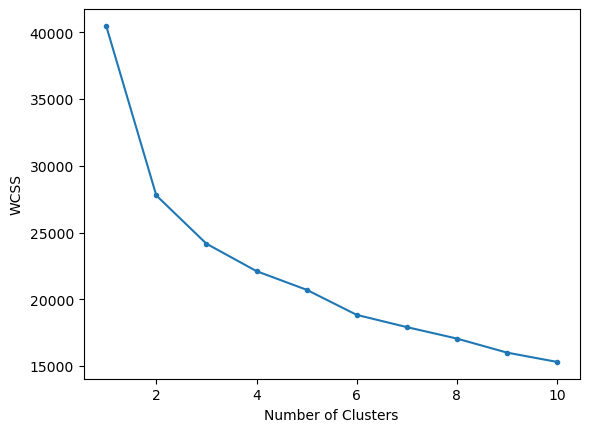

In [168]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Elbow
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(pca_df)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [169]:
# using kneelocator to find the elbow
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  3


In [170]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(pca_df)
pca_df['Cluster'] = agg_clusters
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,4.615117,0.066304,-0.626243,1.628601,-0.646349,-0.959190,0.811336,0.258944,-0.109902,0.048490,1
1,-2.950056,0.110817,-0.185747,-0.869932,-0.490204,1.320093,0.166488,-0.528769,-0.698616,0.904205,2
2,2.262439,-1.052451,-0.936678,-0.412185,-0.180070,-1.550273,1.251259,-0.569302,-0.387817,0.420278,1
3,-2.448496,-1.238748,0.169462,0.255357,0.272872,-0.347144,0.554219,-0.565560,-1.045141,-0.745280,2
4,-0.533879,0.766202,-0.808537,-0.370575,0.284445,-0.196671,-1.110932,1.055808,0.587415,-1.288911,0
...,...,...,...,...,...,...,...,...,...,...,...
2029,3.753458,2.967093,-1.397989,-4.141223,-2.175294,4.222676,-0.902682,-2.321031,-2.154074,-0.998425,1
2030,2.084968,1.587043,-1.579791,1.628809,0.596929,-0.548581,-0.238148,0.179498,0.230179,1.194185,0
2031,2.373728,-0.586530,1.050325,-1.484399,2.457571,-1.603512,-1.121047,0.341528,1.933007,-0.555585,0
2032,1.315342,1.049288,-1.121676,-0.813466,-1.177497,-0.215382,0.938480,-0.954275,-0.905063,0.555390,0


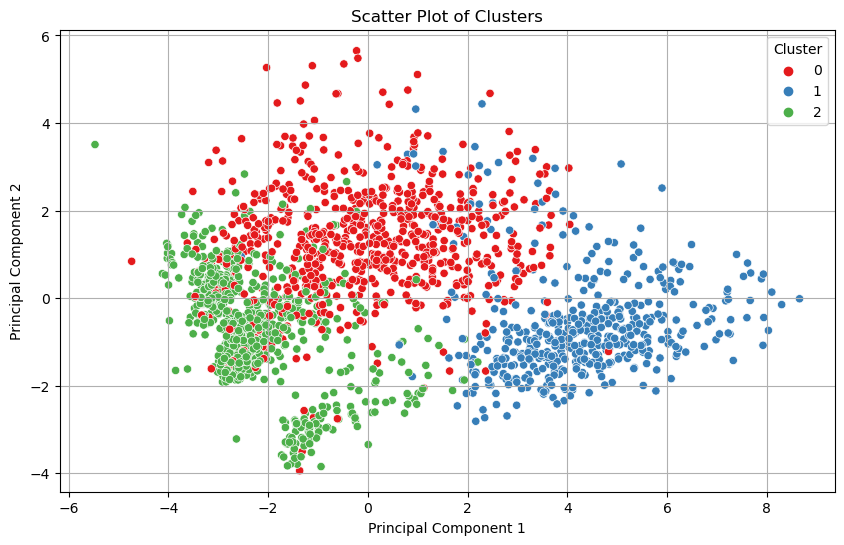

In [171]:
# Scatter Plot Revelations
import seaborn as sns

cluster_palette = sns.color_palette("Set1", n_clusters)

# Cluster patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="Cluster", palette=cluster_palette, legend="full")
plt.title("Scatter Plot of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

# IF DOESN'T USE DIMENSIONALITY REDUCTION:

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

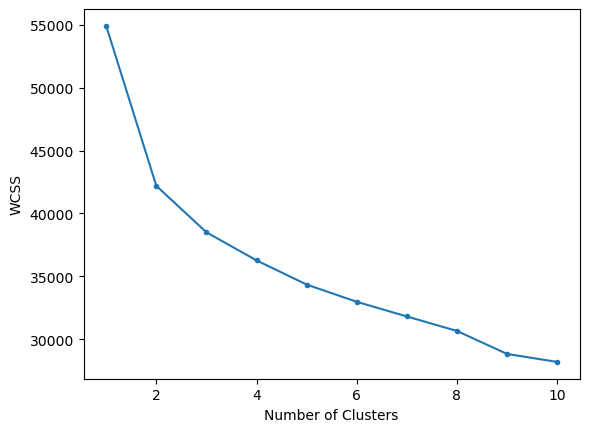

In [173]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Elbow
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(scaled_df)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [174]:
# using kneelocator to find the elbow
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  3


In [175]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(scaled_df)
scaled_df['Cluster'] = agg_clusters
scaled_df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
0,-0.351952,0.226491,0.315957,0.977994,1.551878,1.668188,2.456265,1.467037,0.854261,0.342532,...,-0.11379,-0.099652,2.349304,0.985832,1.672780,0.263395,-1.276237,-1.276237,-1.598732,0
1,-0.351952,-0.235644,-0.374256,-0.872318,-0.636080,-0.713448,-0.647140,-0.630146,-0.730916,-0.174699,...,-0.11379,-0.099652,-0.425658,1.236407,-0.962269,0.263395,1.406829,1.406829,0.625496,1
2,-0.351952,0.754494,-0.788384,0.358258,0.571069,-0.179785,1.342691,-0.148035,-0.034985,-0.691929,...,-0.11379,-0.099652,-0.425658,0.317633,0.279022,1.191895,-1.276237,-1.276237,-1.598732,1
3,-0.351952,-1.007488,-0.788384,-0.872318,-0.560633,-0.651702,-0.501097,-0.581934,-0.750247,-0.174699,...,-0.11379,-0.099652,-0.425658,-1.269340,-0.919180,1.191895,0.065296,0.065296,0.625496,1
4,1.422199,0.232565,1.558341,-0.391949,0.420175,-0.219479,0.156095,-0.003401,-0.556933,1.376993,...,-0.11379,-0.099652,-0.425658,-1.018766,-0.307650,-0.665106,0.065296,0.065296,0.625496,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,-0.351952,24.070996,-0.891916,-0.878249,-0.309144,-0.660522,-0.537608,-0.630146,-0.614927,0.859762,...,-0.11379,-0.099652,-0.425658,-0.684666,-0.904265,1.191895,0.065296,0.065296,0.625496,0
2030,-0.351952,0.347374,-0.098170,1.197422,0.420175,0.062789,0.083073,2.190203,3.927957,-0.174699,...,-0.11379,-0.099652,-0.425658,0.150583,1.215375,-0.665106,0.065296,0.065296,0.625496,2
2031,-0.351952,0.181155,1.454809,1.787506,0.545920,0.217154,-0.099480,-0.364985,-0.382950,-0.691929,...,-0.11379,-0.099652,-0.425658,-1.018766,1.049649,-1.593607,-1.276237,-1.276237,-1.598732,2
2032,0.535124,0.661707,-1.409576,0.364189,0.093239,0.203923,0.776776,0.068915,0.332312,-0.174699,...,-0.11379,-0.099652,-0.425658,1.069357,0.390058,1.191895,0.065296,0.065296,0.625496,2


# Visualization

/var/folders/9q/xjqpb26518s1vvw5v5d2nx8c0000gq/T/ipykernel_6551/776732473.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="Cluster", y="PC1", data=pca_df, palette=cluster_palette)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


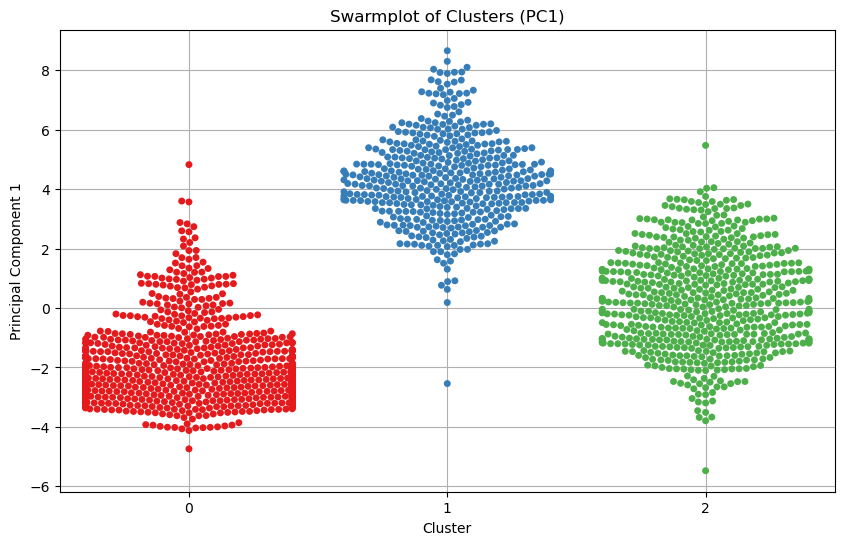

In [137]:
# evaluate clustering models using swarmplot 

plt.figure(figsize=(10, 6))
sns.swarmplot(x="Cluster", y="PC1", data=pca_df, palette=cluster_palette)
plt.title("Swarmplot of Clusters (PC1)")
plt.xlabel("Cluster")
plt.ylabel("Principal Component 1")
plt.grid(True)
plt.show()

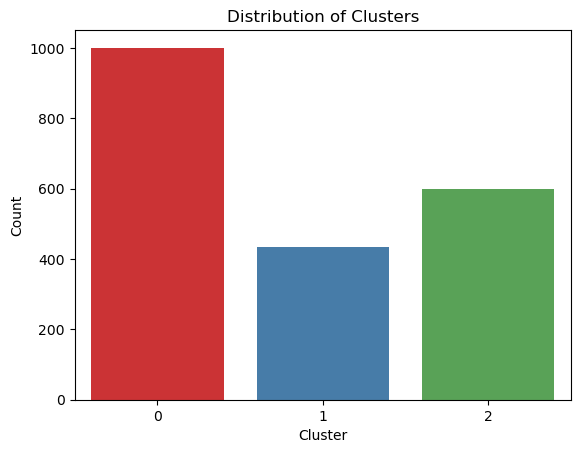

In [140]:
# distribution of cluster chart

sns.countplot(data=pca_df, x="Cluster", palette=cluster_palette)
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# IF DOESN'T USE DIMENSIONALITY REDUCTION:

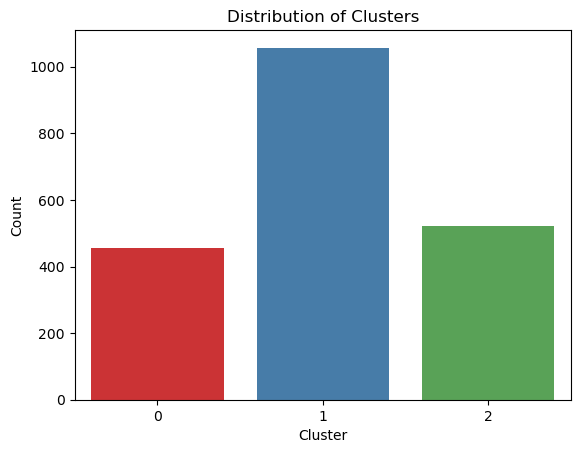

In [180]:
# distribution of cluster chart

sns.countplot(data=scaled_df, x="Cluster", palette=cluster_palette)
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

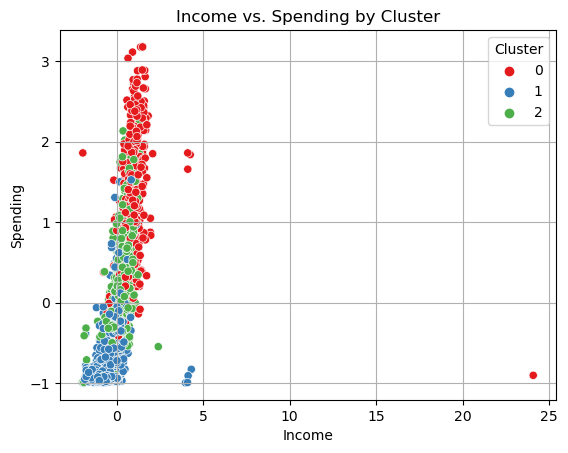

In [179]:
# profiling between income and spending cluster

sns.scatterplot(data=scaled_df, x="Income", y="Spent", hue="Cluster", palette=cluster_palette)
plt.title("Income vs. Spending by Cluster")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

In [186]:
cluster_count = scaled_df['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'Count']

cluster_summary = scaled_df.groupby("Cluster")[["Income", "Spent"]].agg(["mean"]).reset_index()
cluster_summary.columns = ["Cluster", "Income_Mean", "Spent_Mean"]
cluster_summary = cluster_summary.merge(cluster_count, on="Cluster")

cluster_summary


,Cluster,Income_Mean,Spent_Mean,Count
0,0,1.001533,1.331183,455
1,1,-0.576538,-0.716937,1057
2,2,0.294450,0.291407,522
